# Introducción a la librería DEAP

![](https://deap.readthedocs.io/en/master/_images/deap_long.png)

- Fortin, F. A., De Rainville, F. M., Gardner, M. A. G., Parizeau, M., & Gagné, C. (2012). DEAP: Evolutionary algorithms made easy. The Journal of Machine Learning Research, 13(1), 2171-2175. (https://www.jmlr.org/papers/volume13/fortin12a/fortin12a.pdf)

- Documentación: https://deap.readthedocs.io/en/master/about.html

- Repositorio: https://github.com/deap/deap


#### Explorar documentación

In [5]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable


In [70]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import urllib

## Definiendo métodos y clases que se usarán más adelante

In [71]:
# This is the original elitism module.
def elitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook


In [72]:
class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self, maxcapacity=400):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = maxcapacity

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = self.maxCapacity

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))

In [75]:
class NQueensProblem:
    """This class encapsulates the N-Queens problem
    """

    def __init__(self, numOfQueens):
        """
        :param numOfQueens: the number of queens in the problem
        """
        self.numOfQueens = numOfQueens

    def __len__(self):
        """
        :return: the number of queens
        """
        return self.numOfQueens

    def getViolationsCount(self, positions):
        """
        Calculates the number of violations in the given solution
        Since the input contains unique indices of columns for each row, no row or column violations are possible,
        Only the diagonal violations need to be counted.
        :param positions: a list of indices corresponding to the positions of the queens in each row
        :return: the calculated value
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        violations = 0

        # iterate over every pair of queens and find if they are on the same diagonal:
        for i in range(len(positions)):
            for j in range(i + 1, len(positions)):

                # first queen in pair:
                column1 = i
                row1 = positions[i]

                # second queen in pair:
                column2 = j
                row2 = positions[j]

                # look for diagonal threat for th ecurrent pair:
                if abs(column1 - column2) == abs(row1 - row2):
                    violations += 1

        return violations

    def plotBoard(self, positions):
        """
        Plots the positions of the queens on the board according to the given solution
        :param positions: a list of indices corresponding to the positions of the queens in each row.
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        fig, ax = plt.subplots()

        # start with the board's squares:
        board = np.zeros((self.numOfQueens, self.numOfQueens))
        # change color of every other square:
        board[::2, 1::2] = 1
        board[1::2, ::2] = 1

        # draw the squares with two different colors:
        ax.imshow(board, interpolation='none', cmap=mpl.colors.ListedColormap(['#ffc794', '#4c2f27']))

        # read the queen image thumbnail and give it a spread of 70% of the square dimensions:
        urlimg = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/master/Chapter05/queen-thumbnail.png'
#         queenThumbnail = plt.imread()
        queenThumbnail = np.array(PIL.Image.open(urllib.request.urlopen(urlimg)))
        thumbnailSpread = 0.70 * np.array([-1, 1, -1, 1]) / 2  # spread is [left, right, bottom, top]

        # iterate over the queen positions - i is the row, j is the column:
        for i, j in enumerate(positions):
            # place the thumbnail on the matching square:
            ax.imshow(queenThumbnail, extent=[j, j, i, i] + thumbnailSpread)

        # show the row and column indexes:
        ax.set(xticks=list(range(self.numOfQueens)), yticks=list(range(self.numOfQueens)))

        ax.axis('image')   # scale the plot as square-shaped

        return plt


## The OneMax problem

gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

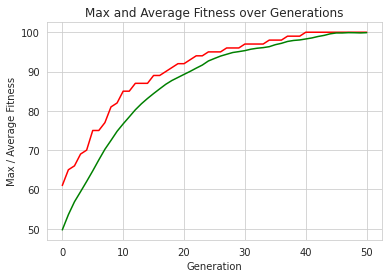

In [76]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                   stats=stats, verbose=True)


    # Genetic Algorithm is done - extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

gen	nevals	max	avg   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

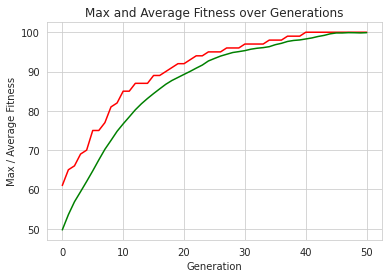

In [77]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info:
    print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    print("Best Ever Individual = ", hof.items[0])

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()

## Mochila

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/375px-Knapsack.svg.png)

gen	nevals	max	avg   
0  	50    	895	637.48
1  	50    	960	775.88
2  	48    	1015	830.4 
3  	46    	1032	874.34
4  	48    	1035	926.48
5  	46    	1100	965.98
6  	42    	1100	1008.74
7  	44    	1130	1044.18
8  	46    	1130	1068.22
9  	45    	1130	1075.28
10 	50    	1130	1090.24
11 	48    	1130	1100.44
12 	45    	1130	1108.2 
13 	47    	1130	1126.5 
14 	45    	1130	1117.7 
15 	46    	1130	1122.6 
16 	47    	1130	1121.6 
17 	48    	1130	1123.5 
18 	46    	1130	1121   
19 	43    	1130	1120.64
20 	46    	1130	1125.9 
21 	46    	1130	1120.1 
22 	45    	1130	1122.8 
23 	46    	1130	1127.7 
24 	44    	1130	1122.1 
25 	49    	1130	1126.5 
26 	44    	1130	1114.4 
27 	42    	1130	1118.5 
28 	44    	1130	1118.7 
29 	43    	1130	1125.14
30 	50    	1130	1125.6 
31 	46    	1130	1127.2 
32 	48    	1130	1127   
33 	46    	1130	1130   
34 	47    	1130	1121.64
35 	47    	1130	1124.2 
36 	36    	1130	1124.3 
37 	48    	1130	1116.9 
38 	45    	1130	1123.2 
39 	42    	1130	1119.7 
40 	47    	1130	1124.88
41

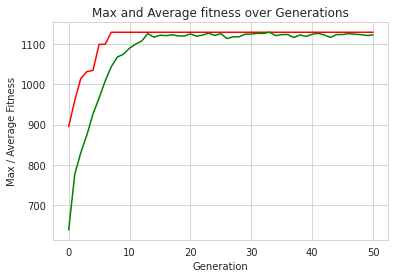

In [78]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# import knapsack

# problem constants:
# create the knapsack problem instance to be used:
knapsack = Knapsack01Problem(maxcapacity=500)

# Genetic Algorithm constants:
POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    print("-- Knapsack Items = ")
    knapsack.printItems(best)

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

## 8 reinas
![](https://codeahoy.com/img/books/recursion/n-queen-problem.png)

gen	nevals	min	avg    
0  	300   	3  	10.4533
1  	246   	3  	8.85333
2  	237   	3  	8.04333
3  	239   	3  	7.66333
4  	244   	2  	7.32333
5  	244   	2  	7.04667
6  	249   	2  	6.82667
7  	241   	2  	6.65333
8  	251   	2  	6.48667
9  	251   	2  	6.29667
10 	241   	2  	5.96667
11 	255   	1  	6.18667
12 	255   	1  	6.15333
13 	256   	1  	5.91333
14 	253   	1  	5.65667
15 	239   	1  	5.63333
16 	247   	1  	5.41667
17 	247   	1  	5.52667
18 	244   	1  	5.08667
19 	249   	1  	5.05667
20 	251   	1  	5.15   
21 	241   	1  	4.94333
22 	240   	1  	4.85333
23 	250   	1  	4.38   
24 	227   	0  	4.32   
25 	245   	0  	4.28   
26 	238   	0  	3.83667
27 	252   	0  	3.68   
28 	242   	0  	3.36   
29 	242   	0  	3.16   
30 	245   	0  	2.96667
31 	251   	0  	2.97   
32 	245   	0  	2.58   
33 	242   	0  	2.42333
34 	246   	0  	2.32333
35 	256   	0  	2.39333
36 	251   	0  	2.51667
37 	247   	0  	2.12667
38 	248   	0  	2.03333
39 	244   	0  	1.90667
40 	251   	0  	1.94333
41 	243   	0  	1.7    
42 	239   	

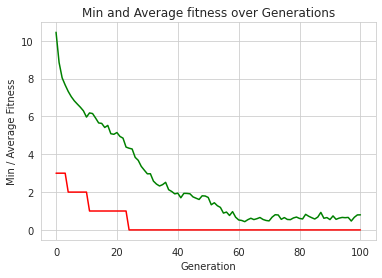

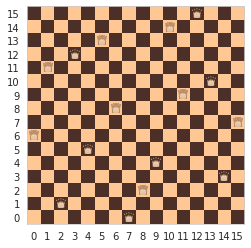

In [79]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# problem constants:
NUM_OF_QUEENS = 16

# Genetic Algorithm constants:
POPULATION_SIZE = 300
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

# set the random seed for repeatable results
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the desired N-
nQueens = NQueensProblem(NUM_OF_QUEENS)

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),  # return a tuple


toolbox.register("evaluate", getViolationsCount)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print hall of fame members info:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # plot best solution:
    sns.set_style("whitegrid", {'axes.grid' : False})
    nQueens.plotBoard(hof.items[0])

    # show both plots:
    plt.show()


if __name__ == "__main__":
    main()


## Optimización de funciones

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
import random


# Importamos los módulos relevantes de la libreria de algoritmos evolutivos 

from deap import base, creator, tools, algorithms

# Importamos este módulo independiente para implementar elitismo, adjunto en la carpeta fuente. 


In [116]:
def polynomial(x):
    y =  - x**6/60 - x**5/50 + x**4/2 + 2*x**3/3 - 3.2*x**2 - 6.4*x
    return -y

def rational(x):
    y = -(x**6 + x**5 - 10*x**2 - 10*x - 12)/(x**2 + 6)
    return y

def irrational(x):
    y = 5 - np.sqrt(x**4 + 2*x**3 - 3*x**2 + 13)
    return y

def trigonometric(x):
    y =  np.sin(3*x + 45)**2 + 0.9*np.sin(9*x)**3 - np.sin(15*x + 50) - np.cos(2*x - 30)
    return y

def asymptoteV(x):
    if -0.05 <= x <= 0.05:   # Para evitar la discontinuidad, definimos un valor "razonable"
        y = 0
    else:
        y = (np.sin(2*np.pi*x) - np.cos(3*np.pi*x))/x
    return y

def asymptoteH(x):
    if -0.05 <= x <= 0.05:  
        y = -16               # Para evitar la discontinuidad
    else:
        y = (2*x - 1)/(x**2)
    return y

def logarithmic(x):
    y = -x**4*(np.log(abs(x)) - 1)
    return y

def exponential(x):
    if -0.01 <= x <= 0.01:
        y = -10                 # Para evitar la discontinuidad
    else:
        y = np.exp(-x)*(np.log(abs(x)) + x/(abs(x)))
    return y

In [117]:
fun = np.vectorize(lambda x: polynomial(x)) # Elegir alguna función de arriba.

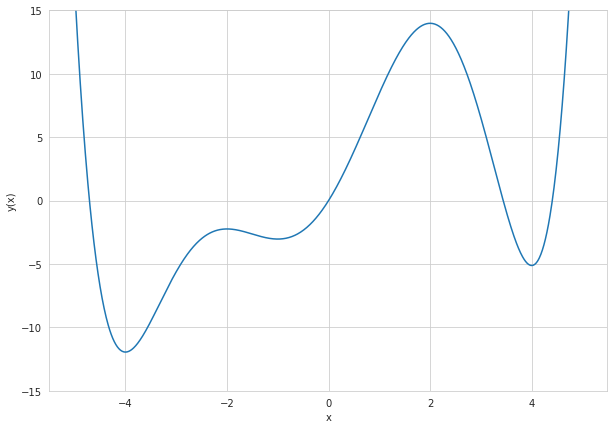

In [105]:
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun(xs))
plt.show()

In [106]:
x = -3.6  # Este valor inicial se puede modificar. Se sugiere cambiarlo para experimentar.
result = minimize(fun, x, bounds = [(-5., 5.)]) # Ajustar los límites, según la función a trabajar.
x_min = result.x
y_min = result.fun

print("Convergencia: ", result.success)
print("X_min = ", x_min)
print("Y_min = ", y_min)

# El método anterior sirve para obtener el mínimo. ¿Cómo obtenemos el máximo de la función?

Convergencia:  True
X_min =  [-4.00000004]
Y_min =  -11.94666666666662


#### DEAP

In [107]:
# Constantes del problema:
DIMENSIONS = 1  # Número de dimensiones 
BOUND_LOW, BOUND_UP = -4.0, 4.0  # Ajustar los límites de la variable independiente

In [108]:
# Parámetros del algoritmo:
POPULATION_SIZE = 10 # A mayor cantidad, mejor desempeño pero mayor cómputo
P_CROSSOVER = 0.8  # Probabilidad de cruza: 0.8 es valor típico
P_MUTATION = 0.3   # Probabilidad de mutación individual, puede ser entre 0.1 y 0.5.
MAX_GENERATIONS = 50  # A mayor cantidad, mejor desempeño pero mayor cómputo
HALL_OF_FAME_SIZE = 1 # Cantidad de mejores individuos que pasan íntegramente a la siguiente generación 
CROWDING_FACTOR = 20.0  # factor no relevante en todas las técnicas

In [109]:
# Para fijar la población inicial:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [110]:
toolbox = base.Toolbox() # Herramienta estructural de DEAP

Las siguientes instrucciones generales crean nuevas clases en DEAP. Correr una sola vez para evitar dificultades

In [111]:
# Define la estrategia de optimización:
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Para hallar máximo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Para hallar mínimo

In [112]:
# Crea la clase individuos:
#creator.create("Individual", list, fitness=creator.FitnessMax)
creator.create("Individual", list, fitness=creator.FitnessMin)

In [113]:
# Crea poblaciones como números aleatorios distribuidos entre las mismas fronteras
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

In [114]:
# Crea un flotante a partir de lo anterior.
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [115]:
# Crea un individo, a partir de lo anterior.
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [95]:
# Crea una población de individuos:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [96]:
# Evalua la función elegida
toolbox.register("evaluate", fun) # Actualizar esta celda cada que se elija una nueva función

In [97]:
# Operadores genéticos:
toolbox.register("select", tools.selTournament, tournsize=2) # Selección por torneo de tamaño 2
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, 
                 eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

In [98]:
def main():

    # Crea la población inicial (generación 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # Guarda datos estadísticos:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
#    stats.register("max", np.max)   # Elegir cuando se busque maximizar
    stats.register("min", np.min)   # Elegir cuando se desee minimizar
    stats.register("avg", np.mean)

    # Define el Salón de la fama para implementar elitismo:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # Incorpora elitismo en el AG:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # Imprime la mejor solución encontrada:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # Estrae los datos estadísticos:
    gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")

    return population, logbook, hof

gen	nevals	min     	avg    
0  	10    	-11.4518	0.16872
1  	8     	-11.4518	-2.50659
2  	8     	-11.4518	-8.23564
3  	6     	-11.7581	-10.4657
4  	7     	-11.9199	-9.99041
5  	7     	-11.9217	-11.1027
6  	7     	-11.9401	-11.3981
7  	3     	-11.9463	-11.8544
8  	6     	-11.9464	-11.9073
9  	7     	-11.9466	-11.9429
10 	6     	-11.9466	-11.9459
11 	8     	-11.9466	-11.648 
12 	9     	-11.9466	-11.5332
13 	7     	-11.9467	-11.9466
14 	9     	-11.9467	-11.7472
15 	9     	-11.9467	-11.8636
16 	8     	-11.9467	-11.924 
17 	8     	-11.9467	-11.924 
18 	6     	-11.9467	-11.935 
19 	6     	-11.9467	-11.7819
20 	8     	-11.9467	-10.8527
21 	5     	-11.9467	-11.7336
22 	9     	-11.9467	-11.2393
23 	8     	-11.9467	-11.9467
24 	8     	-11.9467	-11.334 
25 	8     	-11.9467	-11.9454
26 	7     	-11.9467	-11.6833
27 	7     	-11.9467	-11.7006
28 	8     	-11.9467	-11.7735
29 	6     	-11.9467	-11.7267
30 	8     	-11.9467	-11.7713
31 	8     	-11.9467	-11.6759
32 	6     	-11.9467	-11.9457
33 	8     	-11.9

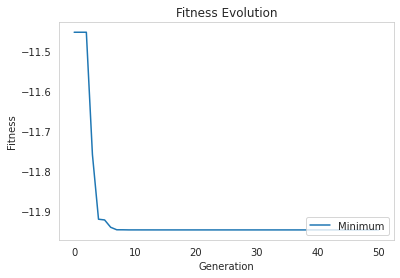

In [99]:
# Llama al flujo principal y muestra los resultados

if __name__ == "__main__":
    pop, log, hof = main()
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    
    best = hof.items[0]
    
    plt.figure()
    plt.plot(gen, min_, label="Minimum") # Elegir para mostrar la evolución del mejor fitness al minimizar
#    plt.plot(gen, max_, label="Maximum") # Elegir para mostrar la evolución del mejor fitness al maxmizar
#    plt.plot(gen, avg, label="Average") # Elegir para mostrar la evolución del promedio del fitness
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

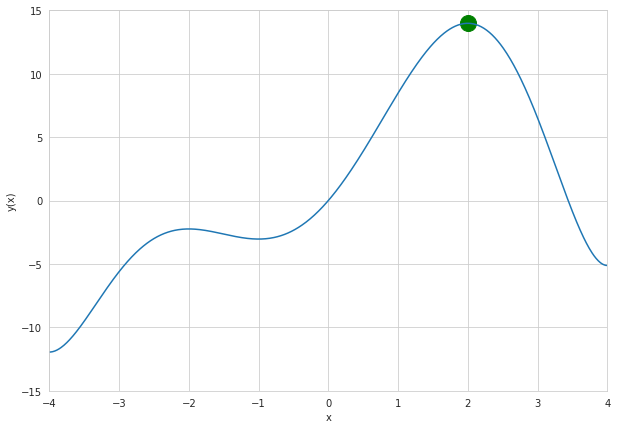

In [100]:
ysol = polynomial(2.0000041694948036)
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.xlim(-4,4)
plt.plot(2.0000041694948036, ysol, marker='o', c='green', markersize=16)
plt.plot(xs, fun(xs))
plt.savefig("max_genetic.png")
plt.show()